In [5]:
# importing necessary libraries in this IA project 

#common python libraries
from statistics import mode
from warnings import filters
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as patches 

#for reading in images and images manipulation 
import cv2

#for label encoding the target variable 
from sklearn.preprocessing import LabelEncoder

#for tensor based operations
from tensorflow.keras.utils import to_categorical, normalize

#for machine learning 
from tensorflow.keras.layers import Flatten,Dense ,Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16 
# from keras.models import models
# from tensorflow.keras.optimazers import Adma
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import Adma

#for face detector 
from mtcnn.mtcnn import MTCNN

In [3]:
# part 1: Create a training dataset
#loading in the dataset from kaggle "https://www.kaggle.com/wobotintelligence/face-mask-detection-dataset"
#and we shoud to create a repestorie data/train.csv and data/Medical mask/Medical mask/Medical mask/images/

#fetching train.csv

In [269]:
#reading in the csv file 
train = pd.read_csv("data/train.csv")
#displaying the first five rows 
train.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [270]:
#printing the total number of data rows 
print(f"Total number of rows: {len(train)}")


Total number of rows: 15412


In [271]:
#total number of unique images 
len(train["name"].unique())

4326

In [272]:
#print the unique elements
train["classname"].unique()

array(['face_with_mask', 'mask_colorful', 'face_no_mask',
       'face_with_mask_incorrect', 'mask_surgical', 'face_other_covering',
       'scarf_bandana', 'eyeglasses', 'helmet', 'face_shield',
       'sunglasses', 'hood', 'hat', 'goggles', 'hair_net', 'hijab_niqab',
       'other', 'gas_mask', 'balaclava_ski_mask', 'turban'], dtype=object)

In [273]:
#classname to select 
options = ["face_with_mask","face_no_mask"]

#select rows that have the classname as either "face_with_mask" or "face_no_mask"
train = train[train["classname"].isin(options)].reset_index(drop=True)
train.sort_values("name", axis=0, inplace=True)





In [274]:
train["classname"].unique()

array(['face_no_mask', 'face_with_mask'], dtype=object)

In [275]:
train.head()

,name,x1,x2,y1,y2,classname
4974,1801.jpg,451,186,895,697,face_no_mask
1327,1802.jpg,110,71,273,272,face_with_mask
5524,1803.jpg,126,75,303,333,face_with_mask
2214,1804.jpg,112,113,262,307,face_with_mask
2330,1805.jpg,728,180,853,336,face_with_mask


<BarContainer object of 2 artists>

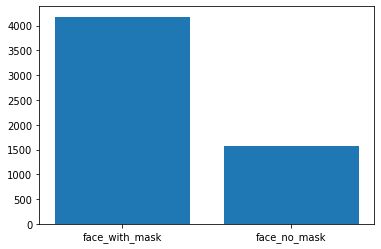

In [276]:
#plotting a bar plot 
x_axis_val = ["face_with_mask","face_no_mask"]
y_axis_val = train.classname.value_counts()
plt.bar(x_axis_val,y_axis_val)

In [277]:
#fetching image from the folder data/Medical mask/Medical mask/Medical mask/images/
#contains images of medical masks
images_file_path = "data/Medical mask/Medical mask/Medical mask/images/"
print(f"Images File path : {images_file_path}")


Images File path : data/Medical mask/Medical mask/Medical mask/images/


In [278]:
#fetching all the file names in the image directory
image_filenames = os.listdir(images_file_path)
print(f"Number of images : {len(image_filenames)}")

Number of images : 6024


In [279]:
#printing out the first five image names 
print(image_filenames[:5])

['0001.jpg', '0002.png', '0003.jpg', '0004.jpg', '0005.jpg']


In [280]:
#looking at the first five rows 
train.head()

,name,x1,x2,y1,y2,classname
4974,1801.jpg,451,186,895,697,face_no_mask
1327,1802.jpg,110,71,273,272,face_with_mask
5524,1803.jpg,126,75,303,333,face_with_mask
2214,1804.jpg,112,113,262,307,face_with_mask
2330,1805.jpg,728,180,853,336,face_with_mask


In [281]:
#getting the full image as an array
sample_image_name =train.iloc[0]["name"]
sample_image_file_path = images_file_path + sample_image_name 

print(sample_image_file_path)

data/Medical mask/Medical mask/Medical mask/images/1801.jpg


In [282]:
#reading in the image as an array 
img = plt.imread(sample_image_file_path)

In [283]:
# pour afficher l'array
img

array([[[153, 147, 149],
        [153, 147, 149],
        [152, 146, 148],
        ...,
        [159, 155, 156],
        [161, 155, 157],
        [160, 154, 156]],

       [[152, 146, 148],
        [152, 146, 148],
        [152, 146, 148],
        ...,
        [160, 156, 157],
        [162, 156, 158],
        [161, 155, 157]],

       [[152, 146, 148],
        [152, 146, 148],
        [152, 146, 148],
        ...,
        [160, 156, 157],
        [161, 155, 157],
        [161, 155, 157]],

       ...,

       [[ 71,  67,  68],
        [ 71,  67,  68],
        [ 71,  67,  68],
        ...,
        [129, 119, 127],
        [128, 122, 126],
        [129, 123, 127]],

       [[ 71,  67,  68],
        [ 71,  67,  68],
        [ 71,  67,  68],
        ...,
        [129, 119, 127],
        [127, 121, 125],
        [128, 122, 126]],

       [[ 71,  67,  68],
        [ 70,  66,  67],
        [ 72,  68,  69],
        ...,
        [128, 121, 128],
        [131, 121, 129],
        [130, 120, 128]]

In [284]:
# pour afficher la dimention de l'array
img.shape

(1385, 1386, 3)

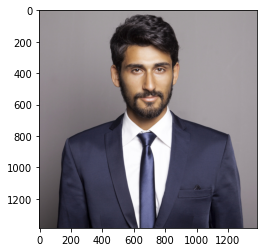

In [285]:
#creating a figure and a sub-plot axis
fig, ax = plt.subplots()
#showing the image 
ax.imshow(img)


In [286]:
#select rows with the same image name as in the "name" column of the train dataframe
sel_df = train[train["name"] == sample_image_name ]

#convert all of the available "bbox" values into a list
bboxes = sel_df[["x1","x2","y1","y2"]].values.tolist()
print(bboxes)

[[451, 186, 895, 697]]


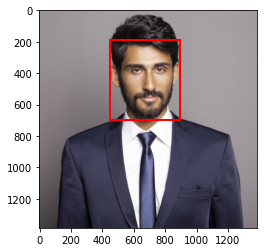

In [287]:
#creating a figure and a sub-plot
fig, ax = plt.subplots()
#showing the image 
ax.imshow(img)
#Plotting the bounding boxes 
for box in bboxes:
    x1,x2,y1,y2 = box
    #x and y co-cordinates
    xy = (x1,x2)
    #width of box 
    width = y1 - x1
    #height of box 
    height = y2 - x2
    rect = patches.Rectangle(
        xy,width,height,linewidth=2,edgecolor="r",facecolor="none",
    )
    ax.add_patch(rect)

In [288]:
# Create training data 
#creating an array of image arrays and their labels
img_size = 50
data = []
#iterating through each row of the dataset
for index,row in train.iterrows():
        #Single row 
        name, x1, x2, y1, y2, classname =row.values
        #full file path 
        full_file_path = images_file_path + name
        #reading in the image as a grayscale image
        img_array = cv2.imread(full_file_path, cv2.IMREAD_GRAYSCALE)
        #selecting the portion covred by the bounding box 
        crop_image = img_array[x2:y2, x1:y1]
        #resizing the image 
        new_img_array = cv2.resize(crop_image,(img_size,img_size))
        #appanding the arrays into a data variable along with bounding box 
        data.append([new_img_array, classname])


In [289]:
data[0][0]#and i can access all of the images one after other buy data[0][0] data[1][0] data[2][0] .............. data[n][0]

array([[ 72,  27,  18, ...,  43, 160, 161],
       [ 67,  19,  15, ...,  21, 128, 159],
       [ 35,  17,  19, ...,  17,  89, 160],
       ...,
       [119, 118, 118, ...,  39, 151, 152],
       [116, 118, 117, ...,  29,  37, 137],
       [117, 116, 116, ...,  29,  30,  49]], dtype=uint8)

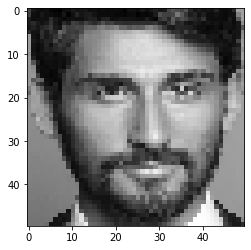

In [290]:
# ploting one of the images after pre-processing 
plt.imshow(data[0][0], cmap="gray")

In [291]:
# let's separate out the independent variables x with the dependent variable y
#initializing an empty list for features
x = []
# initializing an empty list for labels 
y = []

for features,labels in data :
    x.append(features)
    y.append(labels)

In [292]:
#reshaping the image array to proper format
# x[0].shape

In [293]:
#reshaping the feature array (Number of images ,height, weight, color, depth)
x = np.array(x).reshape(-1,50,50,1)
x.shape


(5749, 50, 50, 1)

In [294]:
#next the normalizing the images 
x[0].min(), x[0].max()

(4, 253)

In [295]:
#normalizing to the range between 0 and 1
x = normalize(x , axis=1)


In [296]:
print(y[:5])

['face_no_mask', 'face_with_mask', 'face_with_mask', 'face_with_mask', 'face_with_mask']


In [297]:
#Label encoding the target "y"
lbl = LabelEncoder()
y = lbl.fit_transform(y)


In [298]:
print(y[:5])

[0 1 1 1 1]


In [299]:
# convert it into a catagorical variable 
y = to_categorical(y)

In [300]:
print(y[:5])
#after convertical to categorical variable 
# . [1.0.] : face_no_mask
# . [0. , 1.] : face_with_mask

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [301]:
#part 2 : Training an Image Classification Model (convolutional Neural Network )

In [302]:
#before we build and train the model ,let us select only the height,width and color depth for our input layer
print(x.shape)

(5749, 50, 50, 1)


In [303]:
#keeping only height width and color depth/channel 
input_img_shape = x.shape[1:]
print(input_img_shape)


(50, 50, 1)


In [304]:
#creating a sequential keras model to add layers 
#initializing a sequential keras model
model = Sequential()

In [305]:

#adding a 2D convolution layer
model.add(
    Conv2D(
        filters=100,
        kernel_size=(3,3),
        use_bias= True,
        input_shape=input_img_shape,
        activation= "relu",
        strides=2,
    )
)

In [306]:
#next creating a 2D MaxPooling layer
#adding a max-pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

In [307]:
#adding an other 2D convolution layer - Output Shape = 10 x 10 x 64
model.add(Conv2D(filters=64,kernel_size=(3,3),use_bias= True, activation="relu"))
#adding a max-pooling layer - Output Shape = 5 x 5 x 64
model.add(MaxPooling2D(pool_size=(2,2)))


In [308]:
#flattening the Output from the MaxPooling layer
#adding a Flatten layer - Output Shape = 5 x 5 x 64
model.add(Flatten())

In [309]:
#Passing the flattened array into a fully connected dense layer of 50 neurons
#adding a dense layer - Output Shape = 50
model.add(Dense(50, activation="relu"))

In [310]:
#adding a dropout of 2.0 a final dense layer (output layer) with the activation function as softmax
#adding a dropout 
model.add(Dropout(0.2)) 
#adding a dense layer with the  softmax activation 
model.add(Dense(2,activation="softmax"))
#we have succefully implemented the model architecture! let us take a look at the model summary

In [311]:
#Printing the model summary
model.summary()
#we've  succefully build our model architecture. let's move onto training the model with the below given configuration

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_556 (Conv2D)         (None, 24, 24, 100)       1000      
                                                                 
 max_pooling2d_281 (MaxPooli  (None, 12, 12, 100)      0         
 ng2D)                                                           
                                                                 
 conv2d_557 (Conv2D)         (None, 10, 10, 64)        57664     
                                                                 
 max_pooling2d_282 (MaxPooli  (None, 5, 5, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_95 (Flatten)        (None, 1600)              0         
                                                                 
 dense_329 (Dense)           (None, 50)               

In [312]:
#Initializing an Adma optimizer
opt = Adam(lr=1e-3, decay = 1e-5)
#Configuration the model for training
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
#Training the model
model.fit(x,y,epochs=30, batch_size=5)
# we now have a trained image classification model ready!

Epoch 1/30


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1150/1150 [==============================] - 20s 17ms/step - loss: 0.5405 - accuracy: 0.7361
Epoch 2/30
1150/1150 [==============================] - 21s 18ms/step - loss: 0.4503 - accuracy: 0.7847
Epoch 3/30
1150/1150 [==============================] - 21s 18ms/step - loss: 0.4024 - accuracy: 0.8224
Epoch 4/30
1150/1150 [==============================] - 22s 19ms/step - loss: 0.3595 - accuracy: 0.8441
Epoch 5/30
1150/1150 [==============================] - 21s 19ms/step - loss: 0.3321 - accuracy: 0.8584
Epoch 6/30
1150/1150 [==============================] - 20s 18ms/step - loss: 0.2948 - accuracy: 0.8723
Epoch 7/30
1150/1150 [==============================] - 20s 18ms/step - loss: 0.2646 - accuracy: 0.8866
Epoch 8/30
1150/1150 [==============================] - 21s 18ms/step - loss: 0.2490 - accuracy: 0.8962
Epoch 9/30
1150/1150 [==============================] - 20s 18ms/step - loss: 0.2224 - accuracy: 0.9036
Epoch 10/30
1150/1150 [==============================] - 21s 18ms/step - lo

In [313]:
#part 3: Making a Prediction (make predictions on out of training sample images)
model.save("model.h5")
print(f"le model est bient enregistre !dans le fichier model.h5")

le model est bient enregistre !dans le fichier model.h5


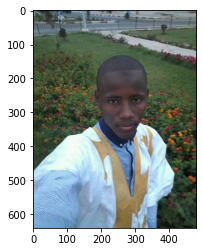

In [325]:
#in this part we will be trying to detect if a person in a image is wearing a face mask or not ,let's start by reading in a sample image that image is out of the training samlple images
#Image file path for sample image images
# test_image_file_path = "sample_test_images/0001.jpg"
test_image_file_path = "sample_test_images/images.jpeg"
#loading the image 
img = plt.imread(test_image_file_path)
#showing the image 
plt.imshow(img)

In [326]:
#initializing the detector 
detector = MTCNN()
#Detecting the face in the image 
faces = detector.detect_faces(img)
print(faces)

[{'box': [190, 198, 141, 179], 'confidence': 0.9999709129333496, 'keypoints': {'left_eye': (235, 267), 'right_eye': (301, 262), 'nose': (275, 308), 'mouth_left': (245, 338), 'mouth_right': (300, 335)}}]


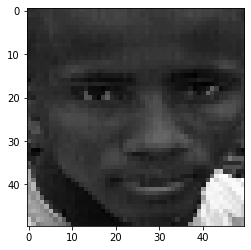

In [327]:
#next performing face detector and image pre-processing together
# reading in the image as a grayscale image 
img_array = cv2.imread(test_image_file_path, cv2.IMREAD_GRAYSCALE)
#initializing the detector 
detector = MTCNN()
#detecting the faces in in the images
faces = detector.detect_faces(img)
#getting the values for bounding box 
x1,x2,width,height= faces[0]["box"]
#selection the portion covred by the bounding box
crop_image = img_array[x2 : x2 + height, x1 : x1 + width]
#resizing the image 
new_img_array = cv2.resize(crop_image,(img_size,img_size))
#Plotting the image
plt.imshow(new_img_array,cmap="gray")


In [328]:
# some more pre-processing
#reshaping image
x = new_img_array.reshape(-1,50,50,1)
#noprmalizing to the range between 0 and 1
x = normalize(x, axis=1)

In [329]:
x.shape

(1, 50, 50, 1)

In [330]:
#making a prediction
prediction = model.predict(x)
print(prediction)


[[9.9995661e-01 4.3401324e-05]]


In [331]:
#interpreting these predictions 
#we can use the np.argmax() methodto find the index with the highest probability values 
# returns the index of maximum value
np.argmax(prediction)

0

In [332]:
### finaly 

if np.argmax(prediction) == 1 :
    result = "c'est bien il porte une masque "
else :
    result = "c'est grave il ne porte pas une masque"
print(result)

c'est grave il ne porte pas une masque
